In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [34]:
df = pd.read_csv("C:/Users/hp/Desktop/Pro/Admission_Predict.csv",sep = ",")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
#Basic Information about Dataset
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

In [36]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


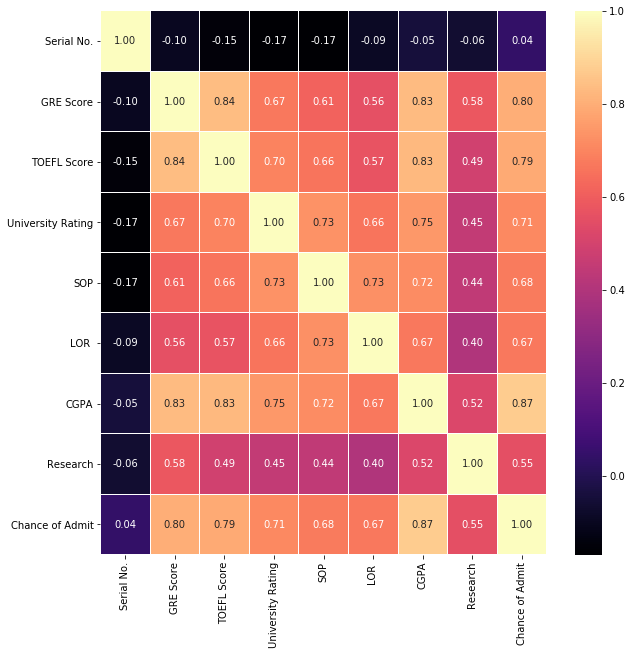

In [37]:
#Correlation between All Columns
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


Not Having Research: 181
Having Research: 219


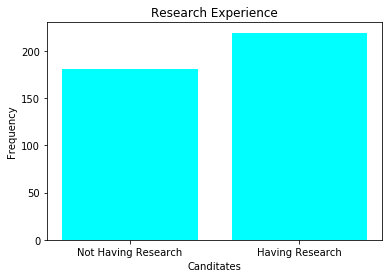

In [38]:
#DATA VISUALIZATION TO UNDERSTAND THE DATASET
#Having Research or not
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y,color='cyan')
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

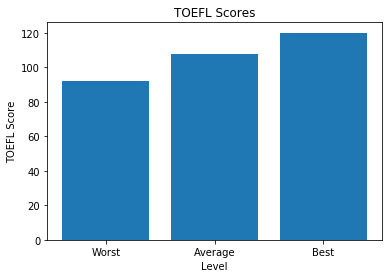

In [39]:
#TOEFL Score:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

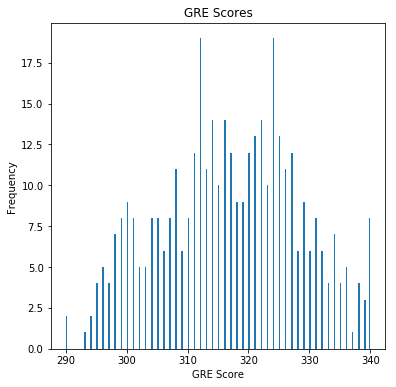

In [40]:
#GRE Score:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

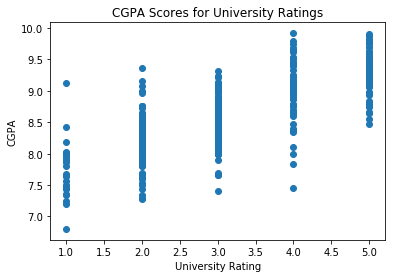

In [41]:
#CGPA Scores for University Ratings:
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

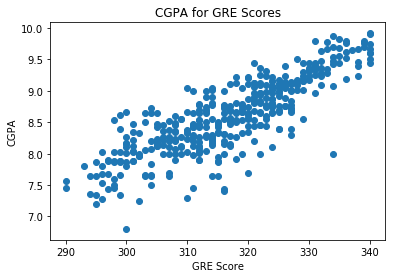

In [42]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

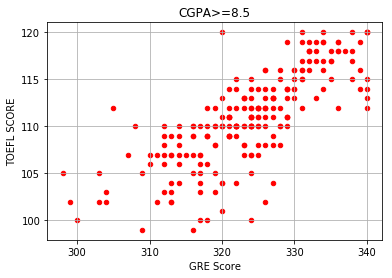

In [43]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

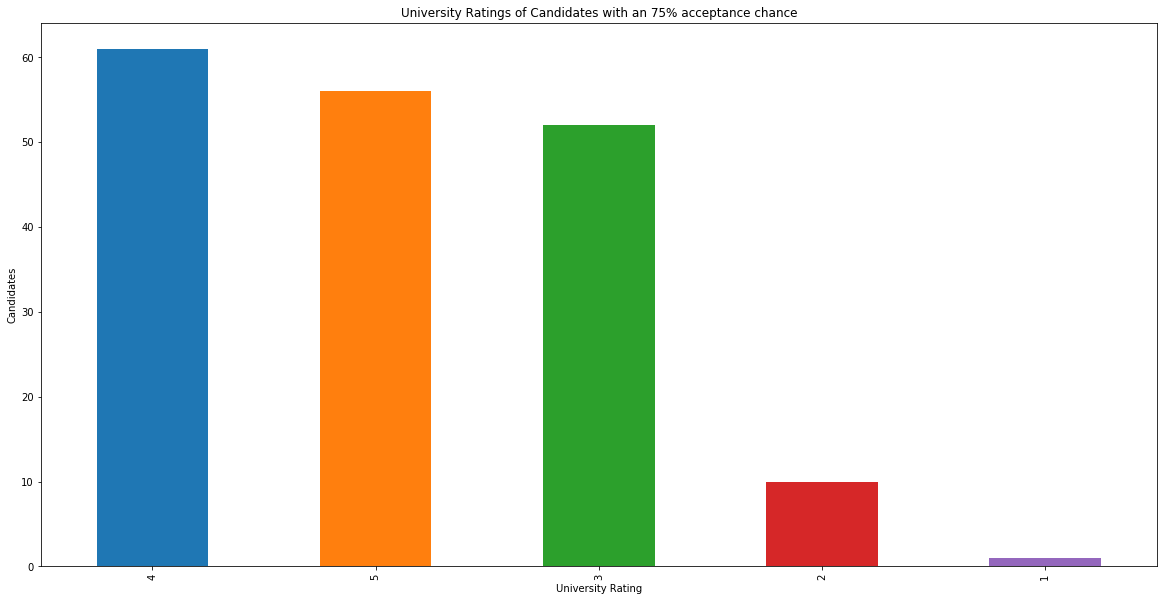

In [44]:
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

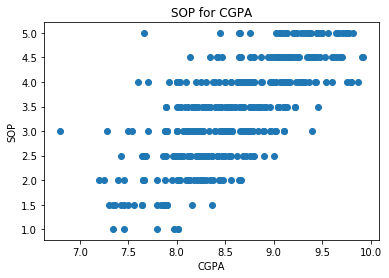

In [45]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

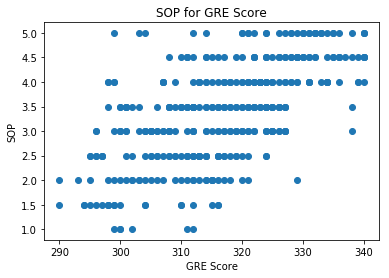

In [46]:
plt.scatter(df["GRE Score"],df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

In [47]:
#dropping the serial number column
df = pd.read_csv("C:/Users/hp/Desktop/Pro/Admission_Predict.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [48]:
#split the data into training and test set 80:20
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [49]:
# normalization-scaling the values in the range(0-1)
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packag

In [50]:
#applying linear regression to our dataset
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.68 -> the predict: [0.72368741]
real value of y_test[2]: 0.9 -> the predict: [0.93536809]
r_square score:  0.821208259148699
r_square score (train dataset):  0.7951946003191086


In [51]:
#applying randomforest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score:  0.8074111823415694
real value of y_test[1]: 0.68 -> the predict: [0.7249]
real value of y_test[2]: 0.9 -> the predict: [0.9407]
r_square score (train dataset):  0.9634880602889714


In [52]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_square score:  0.6262105228127393
real value of y_test[1]: 0.68 -> the predict: [0.73]
real value of y_test[2]: 0.9 -> the predict: [0.94]
r_square score (train dataset):  1.0


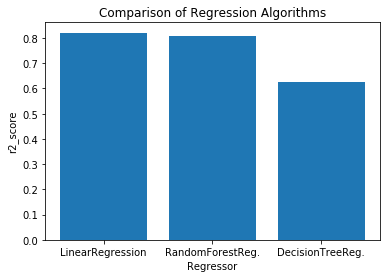

In [53]:
#comparison of regression algorithm
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

In [54]:
#These are the regression estimates for samples with 5 and 50 indexes:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(lr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[50],:])))

real value of y_test[5]: 0.94 -> the predict: [0.92863016]
real value of y_test[5]: 0.94 -> the predict: [0.9167]
real value of y_test[5]: 0.94 -> the predict: [0.91]

real value of y_test[50]: 0.86 -> the predict: [0.89624998]
real value of y_test[50]: 0.86 -> the predict: [0.9111]
real value of y_test[50]: 0.86 -> the predict: [0.93]


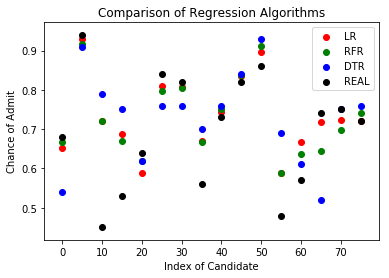

In [55]:
#This is the estimate and the actual acceptance possibilities made with 3 regression algorithms for test samples with 
#0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75 indexes:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

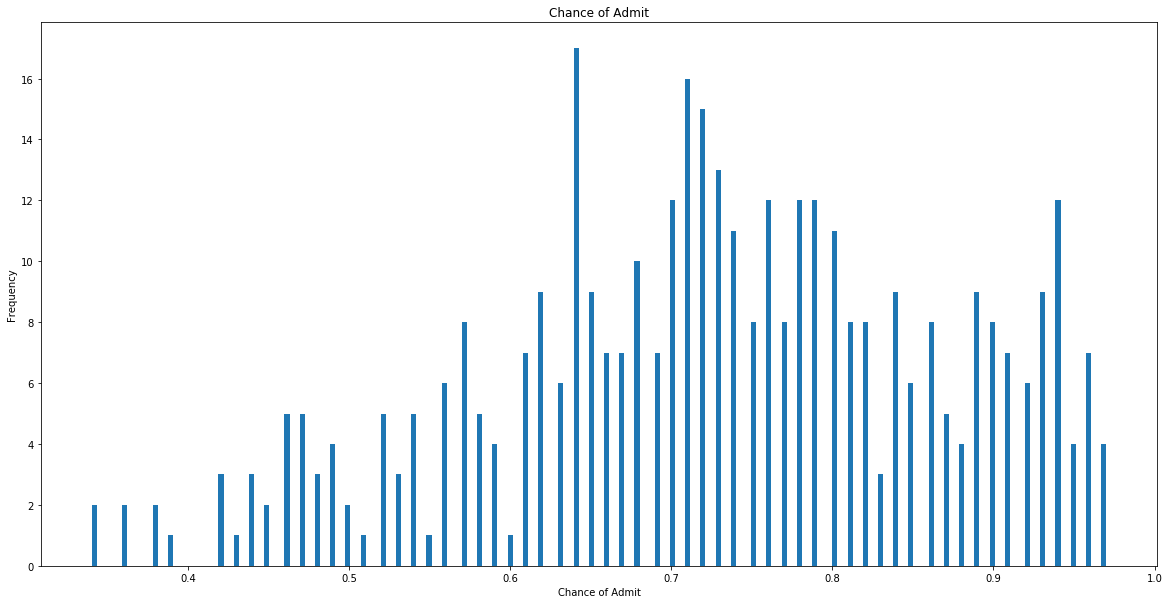

In [56]:
#plot of chance of admission of students against number of students
df["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (20,10))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

In [57]:
#Preparing Data for Classification
#If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
#If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.

# reading the dataset
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/hp/Desktop/Pro/Admission_Predict.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score:  0.9
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


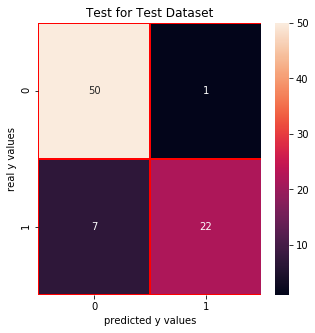

precision_score:  0.9565217391304348
recall_score:  0.7586206896551724
f1_score:  0.8461538461538461


In [58]:
#Logistic Regression


from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train,y_train_01)
print("score: ", lrc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,lrc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,lrc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,lrc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,lrc.predict(x_test)))

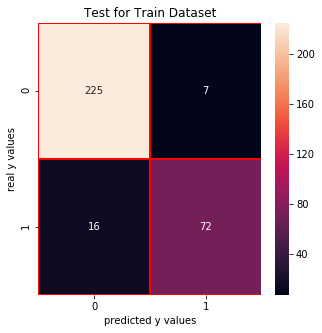

In [59]:
#Test for Train Dataset
cm_lrc_train = confusion_matrix(y_train_01,lrc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score:  0.9
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


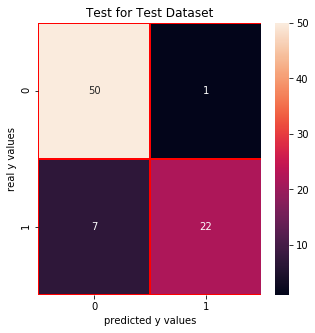

precision_score:  0.9565217391304348
recall_score:  0.7586206896551724
f1_score:  0.8461538461538461


In [60]:
#Support Vector Machine

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_01)
print("score: ", svm.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(svm.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(svm.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,svm.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,svm.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,svm.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,svm.predict(x_test)))

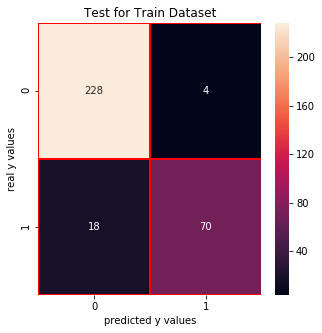

In [61]:
#Test for Train Dataset

cm_svm_train = confusion_matrix(y_train_01,svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  0.9625
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


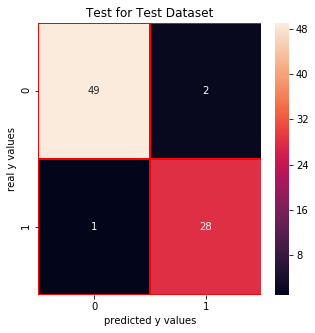

precision_score:  0.9333333333333333
recall_score:  0.9655172413793104
f1_score:  0.9491525423728815


In [62]:
#Gaussian Navie Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train_01)
print("score: ", nb.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(nb.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(nb.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01,nb.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,nb.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,nb.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,nb.predict(x_test)))

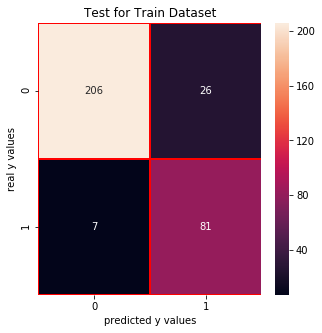

In [63]:
#Test for Train Dataset

cm_nb_train = confusion_matrix(y_train_01,nb.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


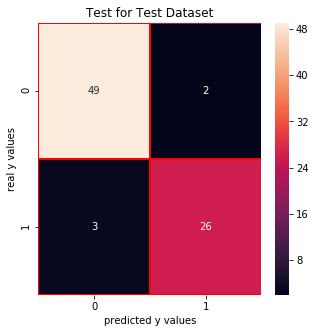

precision_score:  0.9285714285714286
recall_score:  0.896551724137931
f1_score:  0.912280701754386


In [64]:
#Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_01)
print("score: ", dtc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01,dtc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,dtc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,dtc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,dtc.predict(x_test)))

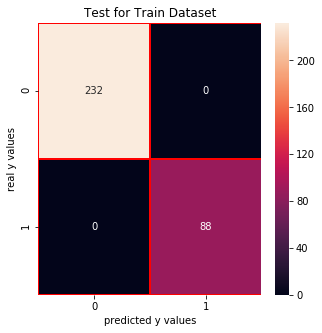

In [65]:
#Test for Train Dataset
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


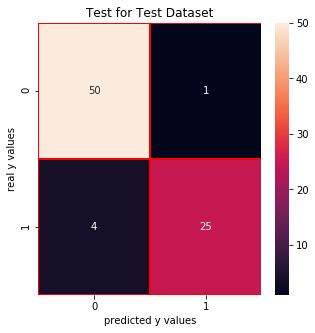

precision_score:  0.9615384615384616
recall_score:  0.8620689655172413
f1_score:  0.9090909090909091


In [66]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(x_train,y_train_01)
print("score: ", rfc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01,rfc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,rfc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,rfc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,rfc.predict(x_test)))

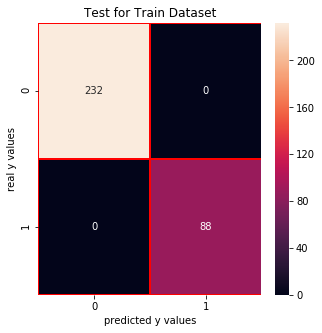

In [67]:
#Test for Train Dataset
cm_rfc_train = confusion_matrix(y_train_01,rfc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

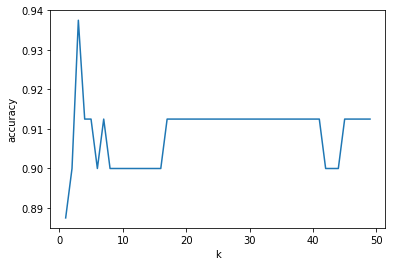

score of 3 : 0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


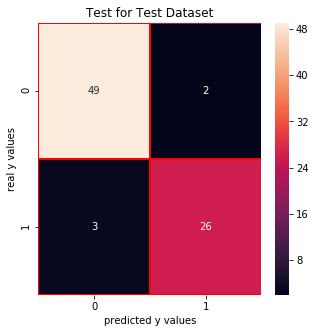

precision_score:  0.9285714285714286
recall_score:  0.896551724137931
f1_score:  0.912280701754386


In [68]:
#K Nearest Neighbour Classification

from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train_01)
print("score of 3 :",knn.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(knn.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(knn.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01,knn.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,knn.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,knn.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,knn.predict(x_test)))

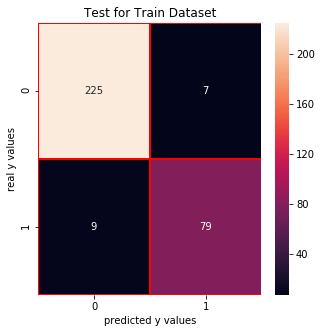

In [69]:
#Test for Train Dataset
cm_knn_train = confusion_matrix(y_train_01,knn.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

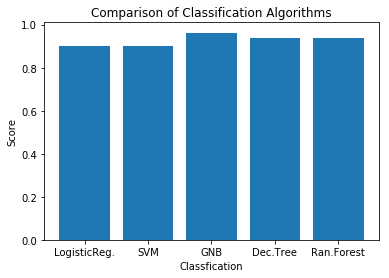

In [71]:
#Comparsion of Classification Algorithm

y = np.array([lrc.score(x_test,y_test_01),svm.score(x_test,y_test_01),nb.score(x_test,y_test_01),dtc.score(x_test,y_test_01),rfc.score(x_test,y_test_01)])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.","SVM","GNB","Dec.Tree","Ran.Forest"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()